## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

## Load Dataset

In [2]:
data = pd.read_csv('Loan_train.csv')
print("Shape of Data : ", data.shape)
data.head(5)

Shape of Data :  (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Here we have total of 13 columns ot of which 'Loan_Status' is the dependent feature (output) and all others are
# independent features. But if we observe the independent features then we can see that the column 'Loan_ID' is 
# of no use for training purpose. So we will drop it

In [4]:
data = data.drop(columns = ['Loan_ID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [5]:
# We can see that now we have 12 columns after dropping the 'Loan_ID',,but there are some which are categorical data,
# some are numerical data. So we need to handle it. And also there are some missing values in some columns, need to 
# handle that as well.

In [6]:
categorical_data = []
numerical_data = []
continuous_numerical_data = []
discrete_numerical_data = []

for i in data.columns:
    if(data[i].dtype == 'object'):
        categorical_data.append(i)

for i in data.columns:
    if(data[i].dtype != 'object'):
        numerical_data.append(i)

for i in numerical_data:
    if(len(data[i].unique()) < 16):
        discrete_numerical_data.append(i)

for i in numerical_data:
    if(len(data[i].unique()) >= 16):
        continuous_numerical_data.append(i)


print("Categorical Data : ", categorical_data)
print("Discrete Numerical Data : ", discrete_numerical_data)
print("Continuous Numerical Data : ", continuous_numerical_data)

Categorical Data :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Discrete Numerical Data :  ['Loan_Amount_Term', 'Credit_History']
Continuous Numerical Data :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


## Data Visualisation

### Categorical Data

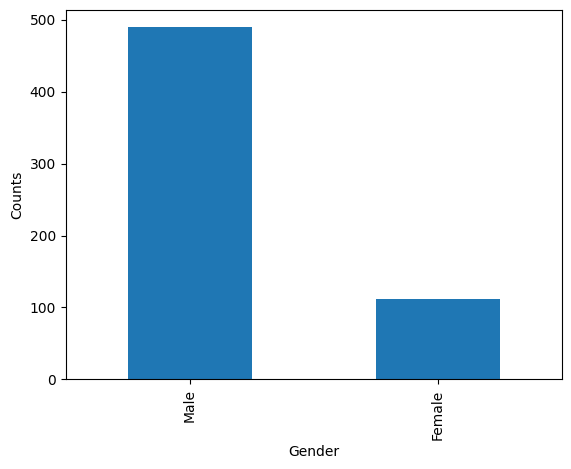

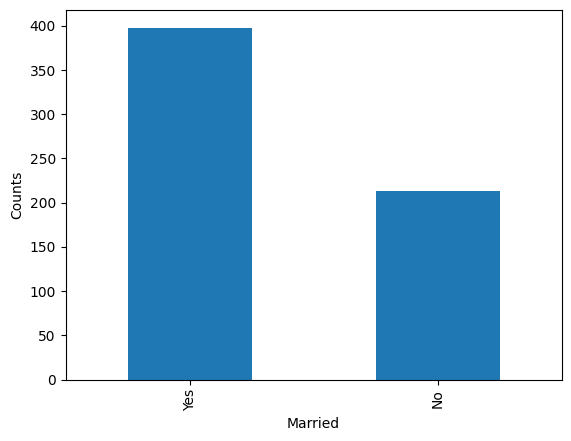

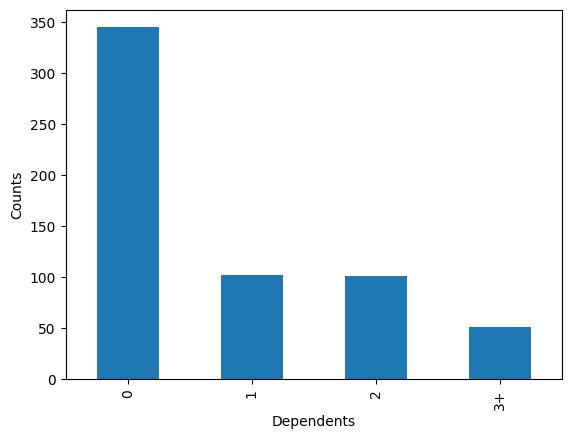

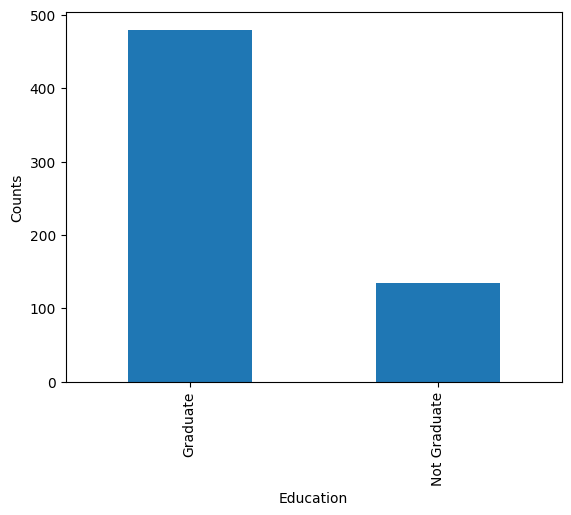

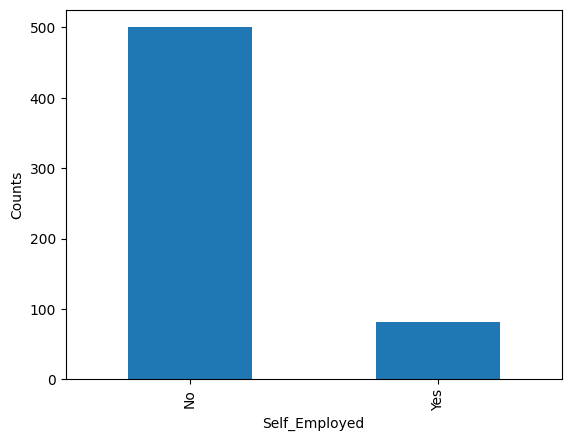

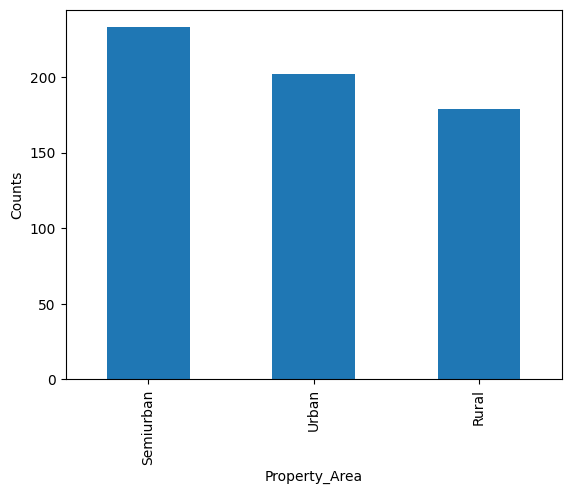

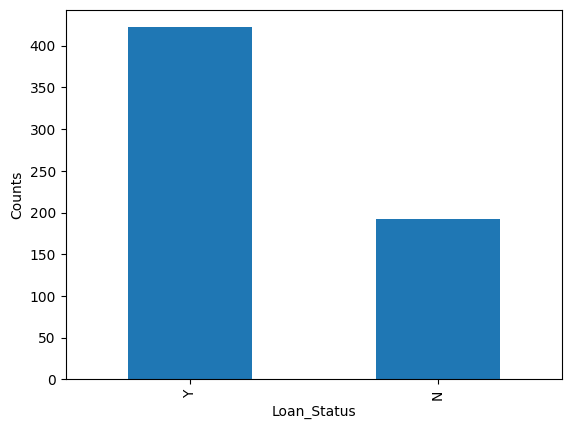

In [7]:
for i in categorical_data:
    data[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

### Discrete Numerical Data

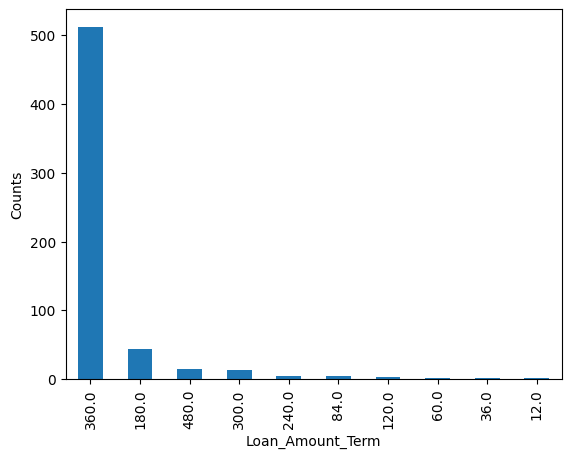

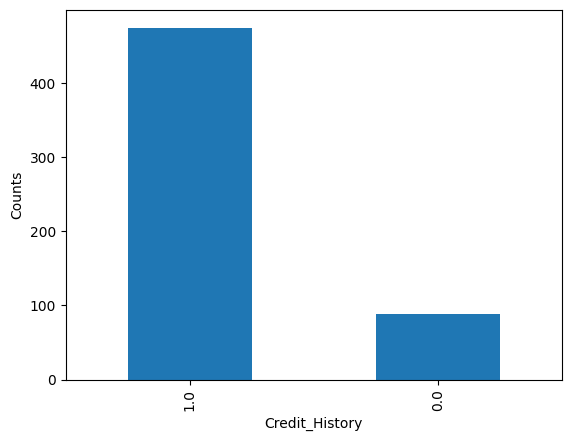

In [8]:
for i in discrete_numerical_data:
    data[i].value_counts().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Counts")
    plt.show()

### Continuous Numerical Data

/Users/susovanpatra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


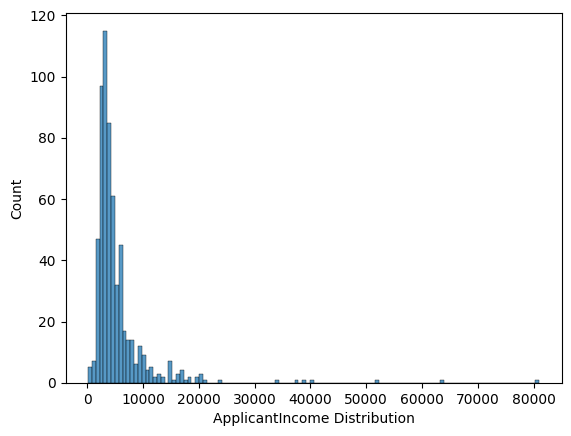

/Users/susovanpatra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


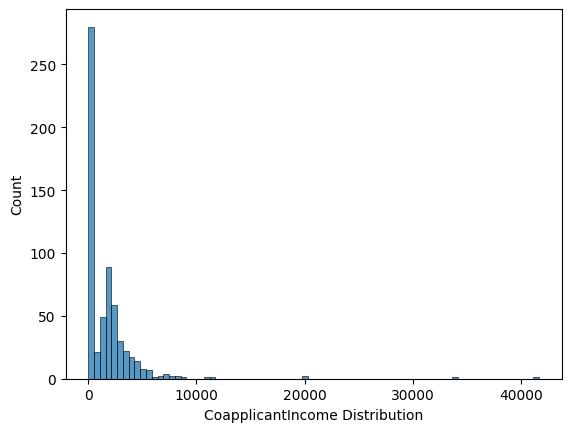

/Users/susovanpatra/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


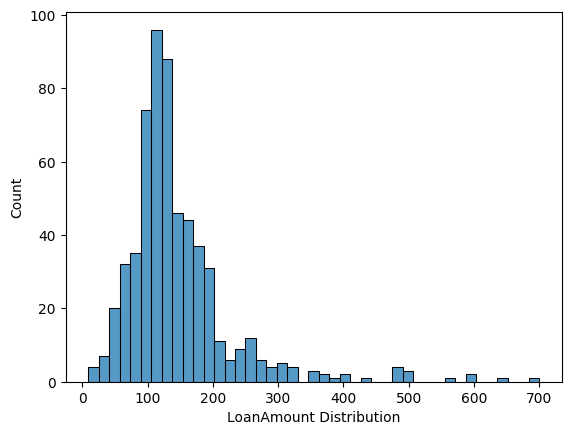

In [9]:
for i in continuous_numerical_data:
    sns.histplot(data[i])
    plt.xlabel(i+" Distribution")
    plt.show()

## Checking for Outliers

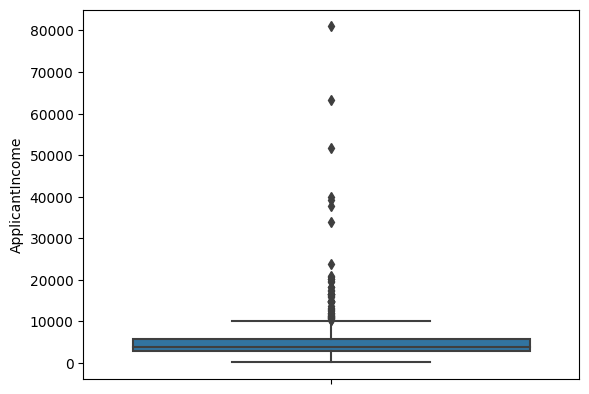

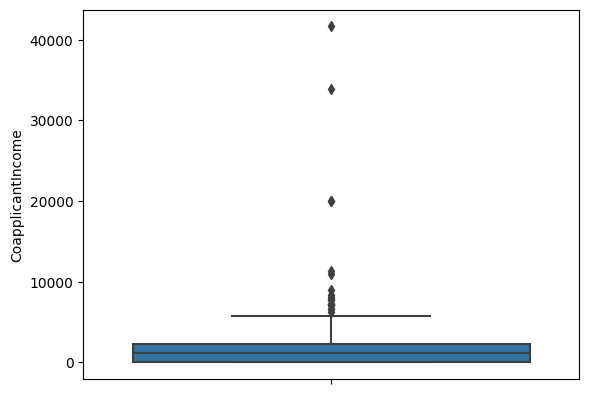

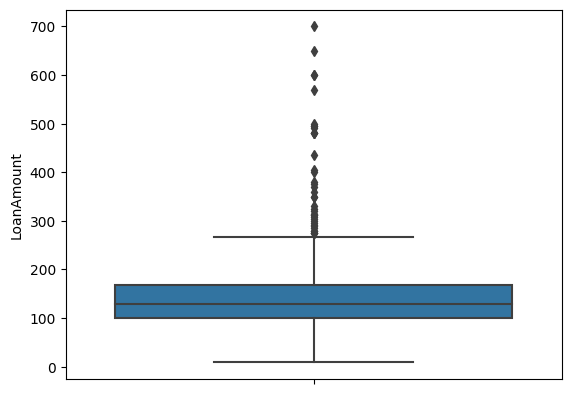

In [10]:
for i in continuous_numerical_data:
    sns.boxplot(data = data, y=i)
    plt.show()

In [11]:
# We can see that Outliers are present.

## Handle Missing Values

<Axes: >

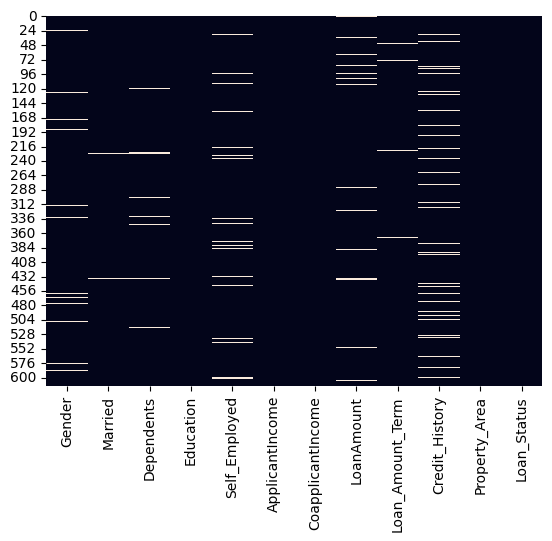

In [12]:
sns.heatmap(data.isnull(), cbar=False)

In [13]:
# We can see that besides 'Education', 'ApplicantIncome', 'CoapplicantIncome' & 'Property_Area' all others have 
# missing values. 
# For Ctergoical and Discrete Numerical Data we will replace it with mode.
# For COntinuous Numerical Data we will replace it with median.

In [14]:
for i in categorical_data:
    data[i] = data[i].fillna(data[i].mode()[0])
    
for i in discrete_numerical_data:
    data[i] = data[i].fillna(data[i].mode()[0])

data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())

<Axes: >

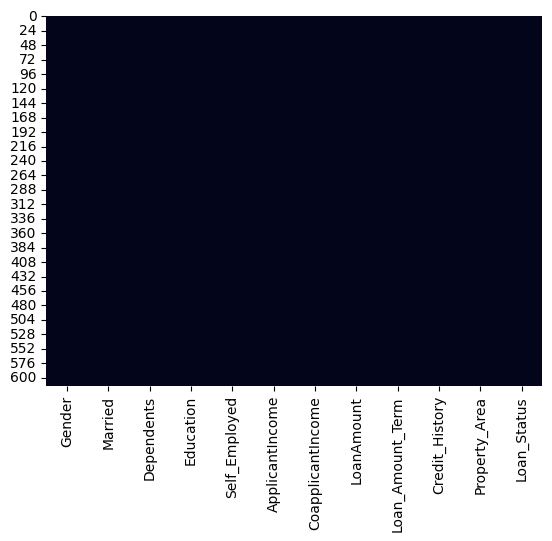

In [15]:
sns.heatmap(data.isnull(), cbar=False)

In [16]:
# We can see no missing values are there now,,,we have handles each one of them

## Feature Engeneering

### 1. Categorical Features 

In [17]:
encoder = LabelEncoder()
for i in categorical_data:
    data[i] = encoder.fit_transform(data[i])

data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


### 2. Discrete Numerical Features

In [18]:
# For Discrete Numerical Data :  ['Loan_Amount_Term', 'Credit_History'], there is nothing we need to do.

### 3. Continuous Numerical Features

In [19]:
# Continuous Numerical Data :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [20]:
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,128.0
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [21]:
# Here if we observe the column 'CoapplicantIncome', in that most of the values are 0, which means for that it won't be
# much useful. So what we can do is we can add the 'ApplicantIncome' & 'CoapplicantIncome' and create a new feature
# named 'TotalIncome' which will be much more logical.

In [22]:
data["TotalIncome"] = data["ApplicantIncome"]+data["CoapplicantIncome"]
data.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

continuous_numerical_data.remove("ApplicantIncome")
continuous_numerical_data.remove("CoapplicantIncome")
continuous_numerical_data.append("TotalIncome")

In [23]:
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,1,6000.0


In [24]:
continuous_numerical_data

['LoanAmount', 'TotalIncome']

## Dependent Independent Feature Split

In [25]:
X = data.drop(columns = ["Loan_Status"])
y = data["Loan_Status"]

In [26]:
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,0,0,128.0,360.0,1.0,2,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,6000.0


In [27]:
y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Building

In [29]:
models = {
            'LogisticRegression': LogisticRegression(),
            'KNeighborsClassifier': KNeighborsClassifier(),
            'SVC': SVC(),
            'DecisionTreeClassifier': DecisionTreeClassifier(),
            'RandomForestClassifier': RandomForestClassifier(),
            'GradientBoostingClassifier': GradientBoostingClassifier(),
            'GaussianNB': GaussianNB()
}

parameters = {
    'LogisticRegression': {'penalty': ['l2'], 'C': [1.0, 2.0, 3.0, 5.0, 10.0, 20.0, 50.0], 'max_iter':[10000, 5000]},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    'SVC': {'kernel': ['linear']},
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10]},
    'RandomForestClassifier': {'n_estimators': [100, 200, 300], 'max_depth': [None, 2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10]},
    'GradientBoostingClassifier': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.5], 'max_depth': [1, 3, 5]},
    'GaussianNB': {}  
}

In [30]:
best_models = []
for model_name, model in models.items():
    classifier = GridSearchCV(model, parameters[model_name], scoring = 'accuracy', cv = 5)
    classifier.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {classifier.best_params_}")
    print(f"Best score for {model_name}: {classifier.best_score_}")
    
    y_predict = classifier.predict(X_test)
    score = accuracy_score(y_predict, y_test)
    print(f"Accuracy score for {model_name}: {score}")
    print(classification_report(y_predict, y_test))
    best_models.append((model_name, classifier.best_score_, score))
    print("-" * 100)

Best parameters for LogisticRegression: {'C': 2.0, 'max_iter': 10000, 'penalty': 'l2'}
Best score for LogisticRegression: 0.815074933881869
Accuracy score for LogisticRegression: 0.7980295566502463
              precision    recall  f1-score   support

           0       0.46      0.94      0.62        35
           1       0.98      0.77      0.86       168

    accuracy                           0.80       203
   macro avg       0.72      0.86      0.74       203
weighted avg       0.89      0.80      0.82       203

----------------------------------------------------------------------------------------------------
Best parameters for KNeighborsClassifier: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best score for KNeighborsClassifier: 0.715251248898031
Accuracy score for KNeighborsClassifier: 0.6206896551724138
              precision    recall  f1-score   support

           0       0.08      0.35      0.13        17
           1       0.92      0.65      0.76

In [31]:
best_models.sort(key=lambda x: x[2], reverse=True)
print("Best models based on accuracy score:")
for model_details in best_models:
    print(f"{model_details[0]}: Accuracy={model_details[2]}, Cross-Validation Score={model_details[1]}")

Best models based on accuracy score:
LogisticRegression: Accuracy=0.7980295566502463, Cross-Validation Score=0.815074933881869
RandomForestClassifier: Accuracy=0.7980295566502463, Cross-Validation Score=0.815074933881869
GradientBoostingClassifier: Accuracy=0.7832512315270936, Cross-Validation Score=0.8175139582721128
DecisionTreeClassifier: Accuracy=0.7783251231527094, Cross-Validation Score=0.8151043197178959
GaussianNB: Accuracy=0.7783251231527094, Cross-Validation Score=0.8004995592124595
SVC: Accuracy=0.7192118226600985, Cross-Validation Score=0.7615633264766382
KNeighborsClassifier: Accuracy=0.6206896551724138, Cross-Validation Score=0.715251248898031


In [32]:
# The best one is - LogisticRegression & RandomForestClassifier
# For both of them the [ Accuracy Score - 79.8%   &   Cross Validation Score - 81.5% ]